In [4]:
import pandas as pd

project_path = '/home/wjunneng/Ubuntu/2019-CDA-Product-Marketing-Model-Construction-And-Forecasting'

df_test_path = project_path + '/data/original/df_test.csv'
df_training_path = project_path + '/data/original/df_training.csv'

df_test = pd.read_csv(df_test_path, encoding='utf-8')
df_training = pd.read_csv(df_training_path, encoding='utf-8')


In [5]:
df_training["'Product using score'"].value_counts()


?      1835
850     104
667      28
684      28
714      25
       ... 
425       1
432       1
471       1
426       1
462       1
Name: 'Product using score', Length: 440, dtype: int64

In [6]:
import numpy as np
df_training.replace('?', np.nan, inplace=True)
df_training.isnull().sum()


ID                                       0
'Product using score'                 1835
'User area'                           1833
gender                                1844
age                                   1821
'Cumulative using time'               1793
'Point balance'                       1768
'Product service usage'               1812
'Pay a monthly fee by credit card'    1882
'Active user'                         1819
' Estimated salary'                   1839
'Purchase or not'                        0
dtype: int64

In [7]:
for column in list(df_training.columns):
    print('\n')
    print(column+' ')
    print(df_training[column].value_counts())
    



ID 
2047    1
6818    1
1257    1
2708    1
8853    1
       ..
5460    1
7509    1
1366    1
3415    1
8192    1
Name: ID, Length: 6000, dtype: int64


'Product using score' 
850    104
667     28
684     28
714     25
649     22
      ... 
433      1
412      1
404      1
399      1
448      1
Name: 'Product using score', Length: 439, dtype: int64


'User area' 
Taipei      2077
Taichung    1063
Tainan      1027
Name: 'User area', dtype: int64


gender 
Male      2315
Female    1841
Name: gender, dtype: int64


age 
35    223
36    212
37    206
40    186
38    185
     ... 
84      1
82      1
85      1
92      1
78      1
Name: age, Length: 68, dtype: int64


'Cumulative using time' 
2     455
9     442
8     436
4     435
3     426
5     420
1     418
7     414
6     402
10    184
0     175
Name: 'Cumulative using time', dtype: int64


'Point balance' 
0            1535
130170.82       2
66392.64        1
120268.13       1
115101.5        1
             ... 
104016.88       1
78

ID


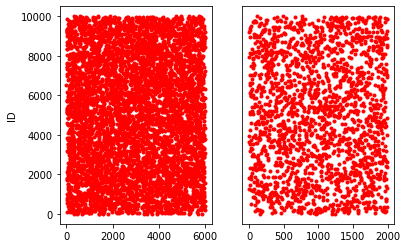

'Product using score'


TypeError: nan is not a string

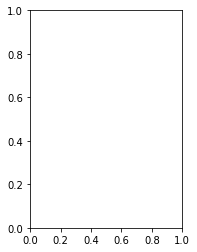

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for column in df_training.columns:
    i += 1
    print(column)
    plt.subplot(1, 2, 1)
    plt.plot(list(df_training.index), df_training.loc[:, column],'r.')
    plt.ylabel(column)
    plt.subplot(1, 2, 2)
    plt.plot(list(df_test.index), df_test.loc[:, column],'r.')
    plt.yticks([])
    plt.show()

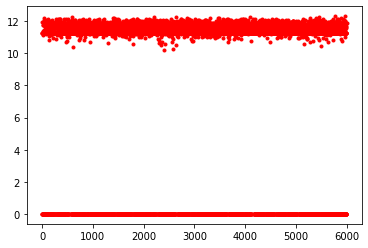

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df_training["'Point balance'"].replace("?", np.nan, inplace=True)
df_training["'Point balance'"] = df_training["'Point balance'"].astype(float)
df_training["'Point balance'"].fillna(df_training["'Point balance'"].mean(), inplace=True)
df_training["'Point balance'"] = np.log1p(df_training["'Point balance'"].values)

plt.plot(list(df_training.index), df_training.loc[:, "'Point balance'"],'r.')
plt.show()
